# Demo for cpu_scheduling_compute

This work notebook demonstrate how to interface with the functions within the compute module. 

Details regarding the unique dictionary structure for each CPU scheduling algorithm is made clear.

In [1]:
from modules.compute import cpu_scheduling_compute
import matplotlib.pyplot as plt
import numpy as np #test

## Functions 

In [2]:
#temp plotting to see results
plot_colors=['blue','green','red','pink','orange','yellow']
def plot_results(results):
    for row in results:
        centre=np.mean(row[1:3])
        width=row[2]-row[1]
        height=row[3]
        label=f'task {int(row[0])+1}'
        plt.bar(centre,height,width,label=label,color=plot_colors[int(row[0])])
    
    scaling=results[-1][2]/len(np.unique(results[:,0]))
    for index in np.unique(results[:,0]):
        index=int(index)
        plt.annotate(f'task{index+1}',[index*scaling,1.4],color=plot_colors[index])



    plt.grid()
    plt.xlim(-1,results[-1][2]+1)
    plt.ylim(0,1.5)
    plt.show()

## Demo usage of FCFS

In [3]:
task_info={"scheduling_algo":'first_come_first_serve',
           'release_time':[1,3,2,15,30],
           'wc_exec_time':[2,4,5,3,9]}

results,dict_info=cpu_scheduling_compute(task_info)

In [4]:
results

array([[ 0.,  1.,  3.,  1.],
       [ 2.,  3.,  8.,  1.],
       [ 1.,  8., 12.,  1.],
       [ 3., 15., 18.,  1.],
       [ 4., 30., 39.,  1.]])

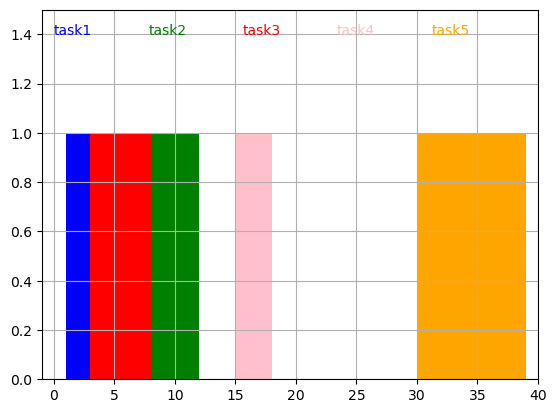

In [5]:
plot_results(results)

## Demo RM

In [6]:
task_info={"scheduling_algo":'rate_monotonic',
           "periods": np.array([8,5,10]),
           "wc_exec_time": np.array([1,2,2]),
           "end_time": 15}

computed_results,dict_info=cpu_scheduling_compute(task_info)

In [7]:
computed_results

array([[ 1,  0,  2,  1],
       [ 0,  2,  3,  1],
       [ 2,  3,  5,  1],
       [ 1,  5,  7,  1],
       [ 1,  5,  7,  1],
       [ 0,  8,  9,  1],
       [ 0,  8,  9,  1],
       [ 1, 10, 10,  1],
       [ 1, 10, 12,  1],
       [ 2, 12, 14,  1],
       [ 2, 12, 14,  1]], dtype=int64)

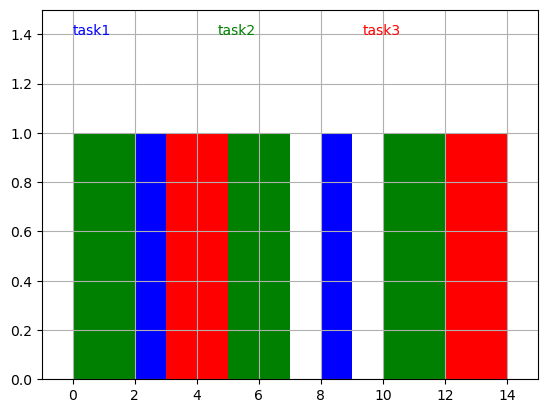

In [8]:
plot_results(computed_results)